In [1]:
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

In [2]:
trt = pd.read_csv("data/treatment_extract/treatment_extracted.tsv", sep="\t", index_col=0)
trt.index = trt.project_id

In [3]:
trt[trt.project_id != "ERP012803"].sample(20).sort_index()

,project_id,sample_id,words,group
project_id,,,,
ERP001706,ERP001706,ERS161376,_fecal_crohn_s_patient_2_amplicon,23
ERP003902,ERP003902,ERS349084,_nc_u_healthy,0
ERP005635,ERP005635,ERS443486,_zgut_2_i_2_c_m_2_d_14_fp,79
ERP006003,ERP006003,ERS473019,_,0
ERP006678,ERP006678,ERS537410,_szaxpi,0
ERP006678,ERP006678,ERS537455,_rszaxpi,1
ERP010229,ERP010229,ERS713900,_ld,0
ERP010458,ERP010458,ERS725696,_p,1
SRP002480,SRP002480,SRS482807,_non_tumor_dna_sample_from_antecubital_fossa_of,3


In [4]:
# get number of samples per project
trt_g = trt.groupby('project_id')
summary = trt_g[['sample_id']].count()

# get number of groups per project
n_groups = trt_g[['group']].apply(lambda x: len(x.drop_duplicates()))
summary.insert(1, "n_groups", n_groups)

summary.head()

,sample_id,n_groups
project_id,,
ERP000108,110,7
ERP001038,12,2
ERP001506,12,12
ERP001596,1,1
ERP001706,38,35


In [5]:
# drop project if n_groups == 1 or n_groups == n_sampels
#n_groups[n_groups != n_samples | n_groups != 1]
cond = (summary["n_groups"] != summary["sample_id"]) #& summary["n_groups"] == 1 
# cond2 = summary["n_groups"] != 1
x = summary.loc[cond]
x = x.loc[x["n_groups"] != 1]

x

,sample_id,n_groups
project_id,,
ERP000108,110,7
ERP001038,12,2
ERP001706,38,35
ERP001739,31,25
ERP003902,223,16
ERP005185,81,3
ERP005635,87,82
ERP006003,88,2
ERP006678,384,2


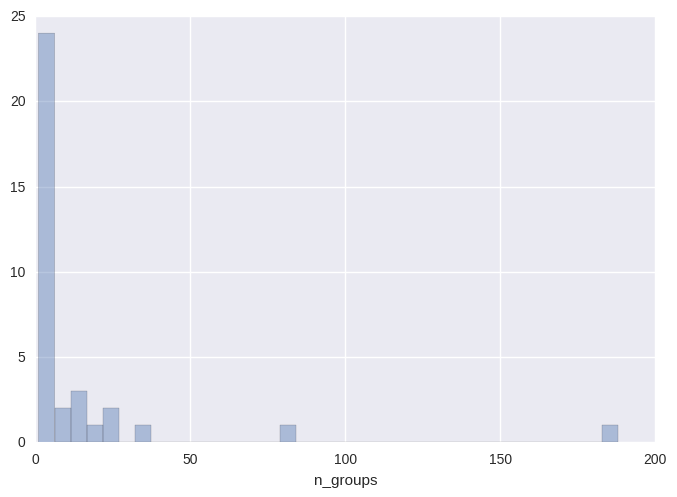

In [6]:
dp = sns.distplot(summary["n_groups"], kde=False);
#dp = sns.distplot(summary["sample_id"]);
sns.plt.show()

In [7]:
trt.align(x, join="right", axis=0)[0].head()

,project_id,sample_id,words,group
project_id,,,,
ERP000108,ERP000108,ERS006573,_mh,0
ERP000108,ERP000108,ERS006562,_mh,0
ERP000108,ERP000108,ERS006561,_mh,0
ERP000108,ERP000108,ERS006538,_mh,0
ERP000108,ERP000108,ERS006486,_mh,0


In [15]:
#do the same with the module

from treatment_extract_using_metadata import select_reasonably_grouped
selected = select_reasonably_grouped(trt)
selected

Index(['ERP000108', 'ERP001038', 'ERP003902', 'ERP005185', 'ERP006003',
       'ERP006678', 'ERP010229', 'ERP010458', 'SRP002480', 'SRP008047',
       'SRP011011'],
      dtype='object', name='project_id')

In [14]:
#trt.align(selected, join="inner", axis=0)[0]
trt.ix[selected].head()

,project_id,sample_id,words,group
project_id,,,,
ERP000108,ERP000108,ERS006573,_mh,0
ERP000108,ERP000108,ERS006562,_mh,0
ERP000108,ERP000108,ERS006561,_mh,0
ERP000108,ERP000108,ERS006538,_mh,0
ERP000108,ERP000108,ERS006486,_mh,0
